# Part I (75 points):  Apply Machine Learning approaches on MNIST Handwritten Digit Dataset

Task7:  (20 points) Training Binary Classifiers on MNIST dataset.



In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import time
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_val, y_train_val) ,(X_test, y_test) = mnist.load_data()   

11501568/11490434 [==============================] - 0s 0us/step


In [4]:

X_valid = []
y_valid = []
X_train = []
y_train = []
i = 1
for x,y in zip(X_train_val, y_train_val):
  if i%12 ==0:
    X_valid.append(x)
    y_valid.append(y)
  else:
    X_train.append(x)
    y_train.append(y)
  i = i+1
X_valid = np.array(X_valid, np.float32)
y_valid = np.array(y_valid)
X_train = np.array(X_train, np.float32)
y_train = np.array(y_train)
X_test = np.array(X_test, np.float32)

Task 7.1: Create a binary classification dataset to distinguish the digits between just two classes (i.e., 1 and not-1,  7 and not 7). Feel free to choose any digit you are interested in to build binary classifier. (Refer to steps in TextBook P88 or steps in Week 2-Lab II: Intro to Classification - Model Selection and Performance Measures)

In [5]:
# Select the number 1, i.e. the image is 1 and not-1
for i,label in enumerate(y_train):
  if label!=1:
    y_train[i]=0
for i,label in enumerate(y_valid):
  if label!=1:
    y_valid[i]=0
for i,label in enumerate(y_test):
  if label!=1:
    y_test[i]=0

Task 7.2: Given the binary classification dataset, examine the frequency of classes in train, validation, and test set. 

In [6]:
#Count the number of training set, validation set and test set in each category
y_train_classnum = [0,0]
y_valid_classnum = [0,0]
y_test_classnum = [0,0]
for label in y_train:
  y_train_classnum[label] = y_train_classnum[label]+1
for label in y_valid:
  y_valid_classnum[label] = y_valid_classnum[label]+1
for label in y_test:
  y_test_classnum[label] = y_test_classnum[label]+1
print(y_train_classnum)
print(y_valid_classnum)
print(y_test_classnum)

[48798, 6202]
[4460, 540]
[8865, 1135]


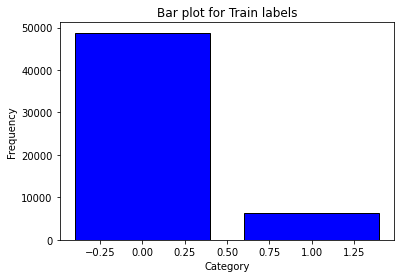

In [7]:
#visualization
fig = plt.figure()
x = [0,1]
plt.bar(x,y_train_classnum, 
        color="blue",
        edgecolor= 'black') 
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar plot for Train labels')
plt.show()

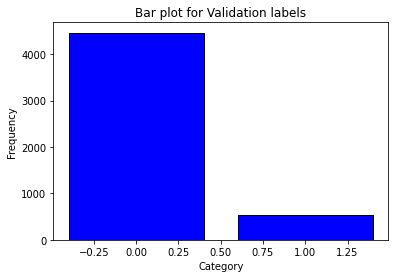

In [8]:

fig = plt.figure()
x = [0,1]
plt.bar(x,y_valid_classnum, 
        color="blue",
        edgecolor= 'black') 
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar plot for Validation labels')
plt.show()

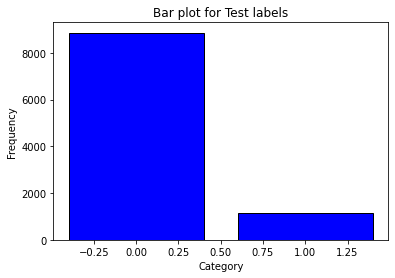

In [9]:

fig = plt.figure()
x = [0,1]
plt.bar(x,y_test_classnum, 
        color="blue",
        edgecolor= 'black') 
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar plot for Test labels')
plt.show()

Task 7.3.1: Proper feature scaling (Standardization  or Min-Max normalization) on the training, validation and test set

In [10]:
X_train , X_valid , X_test = X_train.reshape([-1,28*28]) , X_valid.reshape([-1,28*28]) , X_test.reshape([-1,28*28])
x_train = preprocessing.scale(X_train)  
x_valid = preprocessing.scale(X_valid)
x_test = preprocessing.scale(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and mig

Task 7.3.2: Report running time of model training for all methods above.

Task 7.3.3: Calculate the multiple evaluation metrics (accuracy, precision, 
recall, f1-score, AUC-score) over test set. Summarize the results into the following table (Pandas dataframe is recommended)


In [11]:
#SoftMax Regression
w = tf.Variable(tf.cast(np.random.randn(784,2)*0.001,tf.float32),name="weight")
b = tf.Variable(tf.cast(np.random.randn(2),tf.float32),name="bias")
learning_rate = 0.1
step = 200
batch_size = 256
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)
def logistic_f(x):  
  z = tf.matmul(x,w)+b
  y = tf.nn.softmax(z)
  return y
def loss_f(y_pred, y_true):   
  y_true = tf.one_hot(y_true, depth=2)
  term1 = -y_true*tf.math.log(y_pred)
  loss = tf.reduce_mean(tf.reduce_sum(term1,1))
  return loss
optimizer = tf.optimizers.SGD(learning_rate) 
def run_optimizer(x,y):
    with tf.GradientTape() as g:
        pred = logistic_f(x)
        loss = loss_f(pred,y)
    gradients = g.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients,[w,b]))
def accuracy(y_pred,y_true):  
    y_pred = tf.argmax(y_pred,1)
    y_true = tf.cast(y_true, y_pred.dtype)
    correct = tf.equal(y_pred, y_true)
    correct = tf.cast(correct, tf.float32)
    accuracy = tf.reduce_mean(correct)
    return accuracy

all_loss = []
all_acc = []
start = time.time()
for i, (batch_x, batch_y) in enumerate(train_data.take(step), 1):
  run_optimizer(batch_x, batch_y)
  if i % 50 == 0:
    pred = logistic_f(batch_x)
    loss = loss_f(pred, batch_y)
    all_loss.append(loss)
    acc = accuracy(pred, batch_y)
    all_acc.append(acc)
    print("step: %i, loss: %f, accuracy: %f" % (i, loss, acc))
end = time.time()
print("Training time:{}".format(end-start))  #Task 4.2

step: 50, loss: 0.130627, accuracy: 0.980469
step: 100, loss: 0.097512, accuracy: 0.988281
step: 150, loss: 0.069899, accuracy: 0.984375
step: 200, loss: 0.067802, accuracy: 0.984375
Training time:3.443397045135498


In [12]:
def class_accuracy(y_pred,y_true):
  Auc_score = metrics.roc_auc_score(y_true, np.array(y_pred[:,1]))
  y_pred = np.argmax(y_pred,axis=1)
  y_true = tf.cast(y_true, y_pred.dtype)
  
  class_acc = [0,0]
  classnum = [0,0]
  pred_num = 0
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in y_pred:
    if i==1:
      pred_num +=1
  acc = (class_acc[0]+class_acc[1])/len(y_true)  
  pre = (class_acc[1])/pred_num #Choose 1 is the positive sample
  recall = class_acc[1]/classnum[1]  #recall
  F1_score = (2*pre*recall)/(pre+recall)  #F1-score
  return acc,pre,recall,F1_score,Auc_score


In [15]:
import sklearn.metrics as metrics
train_pred = logistic_f(x_train)
acc,pre,recall,F1_score,Auc_score= class_accuracy(train_pred, y_train)
print("training dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))
valid_pred = logistic_f(x_valid)
acc,pre,recall,F1_score,Auc_score = class_accuracy(valid_pred, y_valid)
print("Validation dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))
test_pred = logistic_f(x_test)
acc,pre,recall,F1_score,Auc_score = class_accuracy(test_pred, y_test)
print("Test dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))

training dataset acc:0.9858727272727272 pre:0.9311715148625019 recall:0.944534021283457 F1_score:0.9378051708957016 Auc_score:0.9945057528684513
Validation dataset acc:0.988 pre:0.9444444444444444 recall:0.9444444444444444 F1_score:0.9444444444444444 Auc_score:0.9956817804351437
Test dataset acc:0.9884 pre:0.9481090589270009 recall:0.9497797356828194 F1_score:0.948943661971831 Auc_score:0.9971251593282497


Task 7.4: Plot the ROC curves for all the binary classifiers

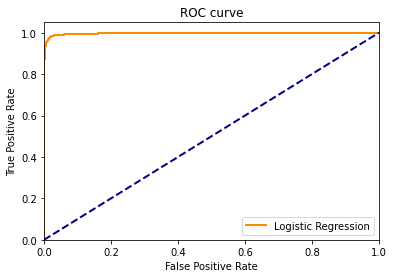

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, np.array(test_pred[:,1]), pos_label=1)   
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Logistic Regression')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(x_train,y_train) 

KNeighborsClassifier(n_neighbors=10)

In [19]:
def class_accuracy(y_pred,y_true):
  Auc_score = metrics.roc_auc_score(y_true, y_pred)
  class_acc = [0,0]
  classnum = [0,0]
  pred_num = 0
  for label in y_true:
    classnum[label] = classnum[label]+1
  for i,label in enumerate(y_true):
    if y_pred[i]==label:
      class_acc[label] += 1
  for i in y_pred:
    if i==1:
      pred_num +=1
  acc = (class_acc[0]+class_acc[1])/len(y_true)  
  pre = (class_acc[1])/pred_num 
  recall = class_acc[1]/classnum[1]  
  F1_score = (2*pre*recall)/(pre+recall)  
  return acc,pre,recall,F1_score,Auc_score

In [20]:
train_pred = knn.predict(x_train)
acc,pre,recall,F1_score,Auc_score= class_accuracy(train_pred, y_train)
print("training dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))
valid_pred = knn.predict(x_valid)
acc,pre,recall,F1_score,Auc_score = class_accuracy(valid_pred, y_valid)
print("Validation dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))
test_pred = knn.predict(x_test)
acc,pre,recall,F1_score,Auc_score = class_accuracy(test_pred, y_test)
print("Test dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))

training dataset acc:0.9942727272727273 pre:0.9624509033778476 recall:0.9877458884230893 F1_score:0.9749343518739555 Auc_score:0.9914240733561817
Validation dataset acc:0.997 pre:0.9781420765027322 recall:0.9944444444444445 F1_score:0.9862258953168044 Auc_score:0.9958769307424015
Test dataset acc:0.9938 pre:0.9550466497031382 recall:0.9920704845814978 F1_score:0.9732065687121867 Auc_score:0.9930459585908052


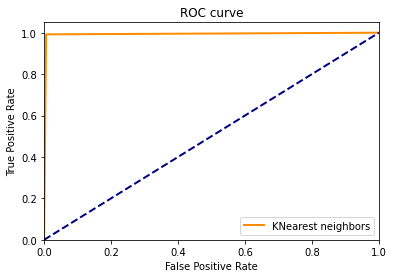

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred, pos_label=1)   
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='KNearest neighbors')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [22]:

# Sigmoid
class SigmoidActivator(object):
    def forward(self, weighted_input):
        return 1.0 / (1.0 + np.exp(-weighted_input))

    def backward(self, output):
        return np.multiply(output, (1 - output))  

# softmax
class SoftmaxActivator(object):
    def forward(self, weighted_input):  
        exps = np.exp(weighted_input - np.max(weighted_input))
        return exps / np.sum(exps)

    def backward(self, output):  
        return 1
        
def one_hot(j): 
    e = np.zeros((2, 1))
    e[j] = 1.0
    return e

class FullConnectedLayer(object):
    def __init__(self, input_size, output_size, activator=None, learning_rate=None):
        self.input_size = input_size
        self.output_size = output_size
        self.activator = activator
        
        self.W = np.random.randn(output_size,input_size)
       
        self.b = np.random.randn(output_size,1)
        
        self.learning_rate = learning_rate
        
        self.output = np.zeros((output_size, 1))  

    def forward(self, input_array):
        self.input = input_array
        self.output = self.activator.forward(np.dot(self.W, input_array) + self.b)
        return self.output

    def backward(self, delta_array):
        self.delta = np.multiply(self.activator.backward(self.output), delta_array)
        self.W_grad = np.dot(self.delta, self.input.T)
        self.b_grad = self.delta

    
    def update(self):
        self.W -= self.learning_rate * self.W_grad
        self.b -= self.learning_rate * self.b_grad

class Network(object):
    
    def __init__(self,input=784,output=10,Activateor=SigmoidActivator()):
        self.fl1 = FullConnectedLayer(input, 32, Activateor, 0.001)
        self.fl2 = FullConnectedLayer(32, 16, Activateor, 0.001)
        self.fl3 = FullConnectedLayer(16, output,SoftmaxActivator(), 0.001)


    def forward(self, input):   
        x = self.fl1.forward(input)
        x = self.fl2.forward(x)
        x = self.fl3.forward(x)
        return x

    def backward(self, labels):   
        delta = self.fl3.output - labels
        self.fl3.backward(delta)
        self.fl2.backward(np.dot(self.fl3.W.T, self.fl3.delta))
        self.fl1.backward(np.dot(self.fl2.W.T, self.fl2.delta))

        self.fl3.update()
        self.fl2.update()
        self.fl1.update()
net = Network(784,2)
start = time.time()
for i in range(1,21): 
  train_pred = []
  valid_pred = []
  loss = 0
  right = 0
  right2 = 0
  for x,y in list(zip(x_train,y_train)):
    x = x.reshape(784,1)
    pretict = net.forward(x)
    net.backward(one_hot(y))
    loss+=1-max(pretict)
    train_pred.append(np.argmax(pretict))
    if np.argmax(pretict) == y:
      right += 1
  for x,y in list(zip(x_valid,y_valid)):
    x = x.reshape(784,1)
    pretict = net.forward(x)
    valid_pred.append(np.argmax(pretict))
    if np.argmax(pretict) == y:
      right2 += 1
  print("epoch:{} Train_Acc:{} Loss:{}".format(i,right/len(y_train),loss/len(y_train)))  
  print("Valid_Acc:{}".format(right2/len(y_valid)))  
end = time.time()
print("Training time:{}".format(end-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


epoch:1 Train_Acc:0.8964 Loss:[0.11541766]
Valid_Acc:0.9572
epoch:2 Train_Acc:0.9609636363636364 Loss:[0.07191354]
Valid_Acc:0.9734
epoch:3 Train_Acc:0.9728545454545454 Loss:[0.04637011]
Valid_Acc:0.9786
epoch:4 Train_Acc:0.9773818181818181 Loss:[0.0350204]
Valid_Acc:0.9812
epoch:5 Train_Acc:0.9802727272727273 Loss:[0.02888582]
Valid_Acc:0.9826
epoch:6 Train_Acc:0.9818 Loss:[0.02508386]
Valid_Acc:0.9848
epoch:7 Train_Acc:0.9832 Loss:[0.02244889]
Valid_Acc:0.986
epoch:8 Train_Acc:0.9841272727272727 Loss:[0.02052536]
Valid_Acc:0.9866
epoch:9 Train_Acc:0.9851090909090909 Loss:[0.01903835]
Valid_Acc:0.9878
epoch:10 Train_Acc:0.9858727272727272 Loss:[0.01783994]
Valid_Acc:0.988
epoch:11 Train_Acc:0.9863818181818181 Loss:[0.01685691]
Valid_Acc:0.9882
epoch:12 Train_Acc:0.9868727272727272 Loss:[0.01604064]
Valid_Acc:0.9882
epoch:13 Train_Acc:0.9875454545454545 Loss:[0.01534741]
Valid_Acc:0.989
epoch:14 Train_Acc:0.988 Loss:[0.01473508]
Valid_Acc:0.99
epoch:15 Train_Acc:0.9884 Loss:[0.01419832

Test dataset acc:0.9891 pre:0.9547872340425532 recall:0.9488986784140969 F1_score:0.9518338488731771 Auc_score:0.9715728586655933


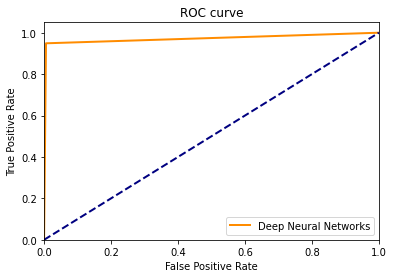

In [23]:
test_pred = []
for x,y in list(zip(x_test,y_test)):
  x = x.reshape(784,1)
  pretict = net.forward(x)
  test_pred.append(np.argmax(pretict))
acc,pre,recall,F1_score,Auc_score = class_accuracy(test_pred, y_test)
print("Test dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred, pos_label=1)   
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Deep Neural Networks')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [24]:
# Support Vector Machine
from sklearn import svm
predictor = svm.SVC(gamma='scale', C=1.0,decision_function_shape='ovr', kernel='rbf')  
start = time.time()
predictor.fit(x_train, y_train)  
end = time.time()
print("Training time:{}".format(end-start))

Training time:119.01910519599915


Test dataset acc:0.9972 pre:0.9902568644818424 recall:0.9850220264317181 F1_score:0.9876325088339223 Auc_score:0.9918905958441726


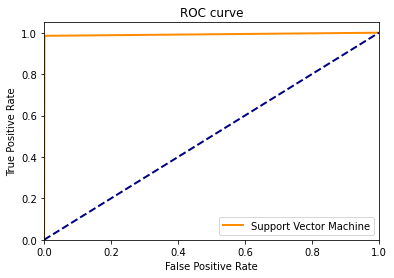

In [25]:
test_pred = predictor.predict(x_test)
acc,pre,recall,F1_score,Auc_score = class_accuracy(test_pred, y_test)
print("Test dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred, pos_label=1)   
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Support Vector Machine')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [26]:
# Decision Tree
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=21, min_samples_split=3,random_state=40,)  
start = time.time()
classifier.fit(x_train, y_train)   
end = time.time()
print("Training time:{}".format(end-start))


Training time:3.0308454036712646


Test dataset acc:0.9918 pre:0.9550561797752809 recall:0.973568281938326 F1_score:0.9642233856893543 Auc_score:0.9838512588484637


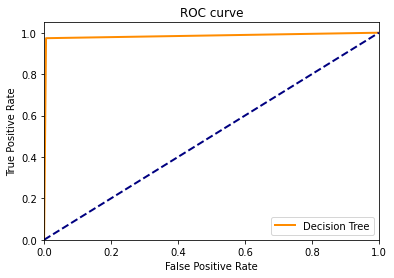

In [27]:
test_pred = classifier.predict(x_test)
acc,pre,recall,F1_score,Auc_score = class_accuracy(test_pred, y_test)
print("Test dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred, pos_label=1)   
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Decision Tree')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()  
start = time.time()
classifier.fit(x_train,y_train)  
end = time.time()
print("Training time:{}".format(end-start))

Training time:20.694494247436523


Test dataset acc:0.9955 pre:0.9981718464351006 recall:0.9621145374449339 F1_score:0.9798115746971737 Auc_score:0.9809444655639786


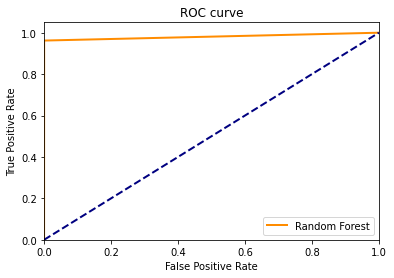

In [29]:
test_pred = classifier.predict(x_test)
acc,pre,recall,F1_score,Auc_score = class_accuracy(test_pred, y_test)
print("Test dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred, pos_label=1)   
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [30]:
# Convolutional Neural Network
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start = time.time()
model.fit(x_train.reshape(-1,28,28), y_train, epochs=5)
end = time.time()
print("Training time:{}".format(end-start))

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0378 - accuracy: 0.9908
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0117 - accuracy: 0.9963
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0069 - accuracy: 0.9978
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0050 - accuracy: 0.9982
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0054 - accuracy: 0.9983
Training time:22.154829025268555


Test dataset acc:0.9975 pre:0.988556338028169 recall:0.9894273127753304 F1_score:0.9889916336415676 Auc_score:0.9939804358574903


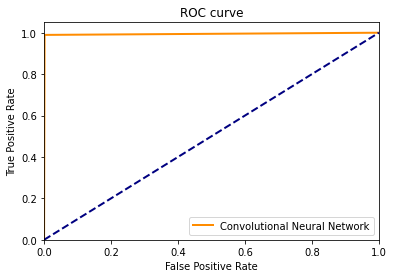

In [31]:
test_pred=np.argmax(model.predict(x_test.reshape(-1,28,28)),axis=1)
acc,pre,recall,F1_score,Auc_score = class_accuracy(test_pred, y_test)
print("Test dataset acc:{} pre:{} recall:{} F1_score:{} Auc_score:{}".format(acc,pre,recall,F1_score,Auc_score))
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred, pos_label=1)   
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Convolutional Neural Network')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [32]:
#Summary of classification Accuracy
nums = np.array([['2.856s','98.52%','91.86%','95.42%','93.60%','99.69%'],['0s','99.38%','95.50%','99.21%','97.32%','99.30%'],['275.5s','98.98%','96.57%','94.36%','95.45%','96.97%'],
                 ['126.9s','99.72%','99.03%','98.50%','98.76%','99.19%'],['2.359s','99.18%','95.51%','97.36%','96.42%','98.39%'],['16.77s','99.5%','99.73%','95.86%','97.75%','97.91%'],['41.54s','99.67%','97.91%','99.21%','98.56%','99.47%']])
colu = ['Training_time','Accuracy','Precision','Recall','F1_score','Auc_score']
index = ['SoftMax Regression','KNearest neighbors','Deep Neural Networks','Support Vector Machine','Decision Tree','Random Forest','Convolutional Neural Network']
pd.DataFrame(data=nums,index = index,columns = colu)

,Training_time,Accuracy,Precision,Recall,F1_score,Auc_score
SoftMax Regression,2.856s,98.52%,91.86%,95.42%,93.60%,99.69%
KNearest neighbors,0s,99.38%,95.50%,99.21%,97.32%,99.30%
Deep Neural Networks,275.5s,98.98%,96.57%,94.36%,95.45%,96.97%
Support Vector Machine,126.9s,99.72%,99.03%,98.50%,98.76%,99.19%
Decision Tree,2.359s,99.18%,95.51%,97.36%,96.42%,98.39%
Random Forest,16.77s,99.5%,99.73%,95.86%,97.75%,97.91%
Convolutional Neural Network,41.54s,99.67%,97.91%,99.21%,98.56%,99.47%
